In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Set seed for reproducible results
np.random.seed(414)

# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

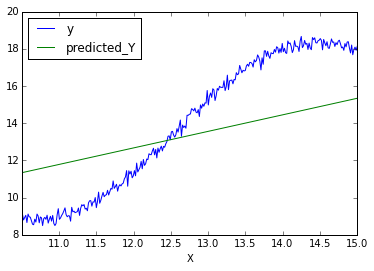

In [10]:
# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()
#graph = pd.scatter_matrix(test_df)
#poly_1.summary()

def getData(x):
    return (0.8896*x) + 1.9959

test_df['predicted_Y'] = test_df['X'].map(lambda x: getData(x))
test_df.set_index('X').plot()

In [7]:
# Quadratic Fit
poly_1 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()
poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     694.4
Date:                Sat, 05 Mar 2016   Prob (F-statistic):          1.25e-166
Time:                        19:18:39   Log-Likelihood:                -1459.6
No. Observations:                 700   AIC:                             2925.
Df Residuals:                     697   BIC:                             2939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1458      0.221     14.261      0.000         2.713     3.579
X              0.2313      0.097      2.382      0.017         0.041     0.422
I(X ** 2)      0.0627      0.009      7.004      0.000         0.045     0.080
==============================================================================
Omnibus:                     1210.467   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.911
Skew:                          -0.091   Prob(JB):                     1.45e-11
Kurtosis:                       1.705   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""